# What are some examples of time series data?
* stock market
* weather trends
* calendar app
* pandemic research, epidemic research, virus spread
* login data
* toilet paper sales (supply/demand)


# Time Series Mode of Thought
* This day depends on some past event(s)
    * toilet paper pricing depends on previous day pricing
    * weather today depends on weather yesterday, weather 30 days ago, weather 365 days ago

# Managing Time Series Data - Lab

## Introduction

In the previous lecture, you learned that time series data are everywhere and understanding time series data is an important skill for data scientists!

In this lab, you'll practice your previously learned techniques to import/load, clean and manipulate time series data.

The lab will cover how to perform time series analysis while working with large datasets. The dataset can be memory intensive so your computer will need at least 2GB of memory to perform some of the calculations.


## Objectives

You will be able to:

* Load time series data using Pandas and perform time series indexing
* Perform index based slicing to create subsets of a time series
* Change the granularity of a time series 
* Perform basic data cleaning operations on time series data

## Let's get started!

We will start the lab by loading the required libraries 

* `pandas` for data wrangling and manipulations  
* `matplotlib` for visualizing time series data 
* `statsmodels` primarily for bundled datasets 

In [2]:
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt

## Loading time series data
The `StatsModels` library comes bundled with built-in datasets for experimentation and practice. A detailed description of these datasets can be found [here](http://www.statsmodels.org/dev/datasets/index.html). Using `StatsModels`, the time series datasets can be loaded straight into memory. 

In this lab, we'll use the **"Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A."**, containing CO2 samples from March 1958 to December 2001. Further details on this dataset are available [here](http://www.statsmodels.org/dev/datasets/generated/co2.html).

We can bring in this data using the `load()` method, which will allow us to read this data into a pandas dataframe by using `dataset["data"]` and setting the index to the time series data.  

In [15]:
# Load the "co2" dataset from sm.datasets
data_set = sm.datasets.co2.load()

# load in the data_set into pandas data_frame
df = pd.DataFrame(data=data_set["data"])
df.head()

/Users/rafael/anaconda3/envs/flatiron-env/lib/python3.6/site-packages/statsmodels/datasets/utils.py:344: FutureWarning: load will return datasets containing pandas DataFrames and Series in the Future.  To suppress this message, specify as_pandas=False
  FutureWarning)


,index,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [22]:
df.tail()

,co2
date,
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3
2001-12-29,371.5


In [5]:
# this data is not in datetime index formatting it's currently in row index formatting

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2284 entries, 0 to 2283
Data columns (total 2 columns):
index    2284 non-null datetime64[ns]
co2      2225 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.8 KB


In [17]:
df.rename(columns={"index": "date"}, inplace=True)
df.head()

,date,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [18]:
# set index to date column
df.set_index('date', inplace=True)

df.head()

,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Data columns (total 1 columns):
co2    2225 non-null float64
dtypes: float64(1)
memory usage: 35.7 KB


Let's check the type of CO2 and also first 15 entries of CO2 dataframe as our first exploratory step.

In [10]:
# Print the datatype of CO2 and check first 15 values

# datatype of CO2 is <class 'pandas.core.frame.DataFrame'>

#               co2
# 1958-03-29  316.1
# 1958-04-05  317.3
# 1958-04-12  317.6
# 1958-04-19  317.5
# 1958-04-26  316.4
# 1958-05-03  316.9
# 1958-05-10    NaN
# 1958-05-17  317.5
# 1958-05-24  317.9
# 1958-05-31    NaN
# 1958-06-07    NaN
# 1958-06-14    NaN
# 1958-06-21    NaN
# 1958-06-28    NaN
# 1958-07-05  315.8

With all the required packages imported and the CO2 dataset as a Dataframe ready to go, we can move on to indexing our data.

## Data Indexing

You may have noticed that by default, the dates have been set as the index of our pandas DataFrame. While working with time series data in Python, it's important to always ensure that dates are used as index values and are set as a `timestamp` object. Timestamp is the pandas equivalent of python’s `Datetime` and is interchangeable with it in most cases. It's the type used for the entries that make up a `DatetimeIndex`, and other time series oriented data structures in pandas. Further details can be found [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html).

We can confirm these assumption in python by checking index values of a pandas dataframe with `DataFrame.index`. 

In [12]:
# Confirm that date values are used for indexing purpose in the CO2 dataset 

# DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
#                '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
#                '1958-05-24', '1958-05-31',
#                ...
#                '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
#                '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
#                '2001-12-22', '2001-12-29'],
#               dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [20]:
df.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='date', length=2284, freq=None)

The output above shows that our dataset clearly fulfills the indexing requirements. Look at the last line:


### **dtype='datetime64[ns]', length=2284, freq='W-SAT'**


* `dtype=datetime[ns]` field confirms that the index is made of timestamp objects.
* `length=2284` shows the total number of entries in our time series data.
* `freq='W-SAT'` tells us that we have 2,284 weekly (W) date stamps starting on Saturdays (SAT).

## Resampling

Remember that depending on the nature of analytical question, the resolution of timestamps can also be changed to other frequencies. For this data set we can resample to monthly CO2 consumption values. This can be obtained by using the `resample() function`. Let's

* Group the time-series into buckets representing 1 month using `resample()` function.
* Apply a `mean()`function on each group (i.e. get monthly average).
* Combine the result as one row per monthly group.

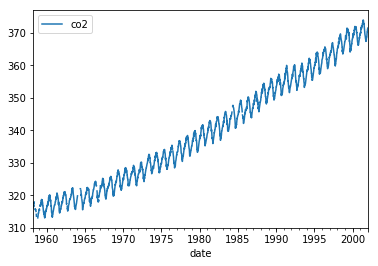

In [24]:
df.plot()
plt.show()

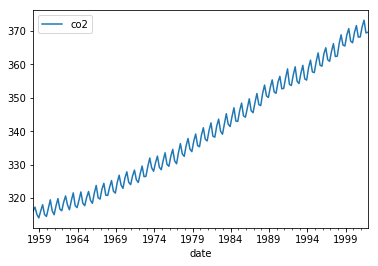

In [30]:
df.resample('3m').mean().plot()
plt.show()

In [14]:
# Group the timeseries into monthly buckets
# Take the mean of each group 
# get the first 10 elements of resulting timeseries


# 1958-03-01    316.100000
# 1958-04-01    317.200000
# 1958-05-01    317.433333
# 1958-06-01           NaN
# 1958-07-01    315.625000
# 1958-08-01    314.950000
# 1958-09-01    313.500000
# 1958-10-01           NaN
# 1958-11-01    313.425000
# 1958-12-01    314.700000
# Freq: MS, Name: co2, dtype: float64

Looking at the index values, we can see that our time series now carries aggregated data on monthly terms, shown as `Freq: MS`. 

### Time-series Index Slicing for Data Selection

Slice our dataset to only retrieve data points that come after the year 1990.

In [16]:
# Slice the timeseries to contain data after year 1990. 

# 1990-01-01    353.650
# 1990-02-01    354.650
#                ...   
# 2001-11-01    369.375
# 2001-12-01    371.020
# Freq: MS, Name: co2, Length: 144, dtype: float64

In [35]:
df[df.index>'1989/12/31']

,co2
date,
1990-01-06,353.4
1990-01-13,353.5
1990-01-20,353.8
1990-01-27,353.9
1990-02-03,354.1
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2


Slice the time series for a given time interval. Let's try to retrieve data starting from Jan 1990 to Jan 1991.

In [18]:
# Retrieve the data between 1st Jan 1990 to 1st Jan 1991

# 1990-01-01    353.650
# 1990-02-01    354.650
# 1990-03-01    355.480
# 1990-04-01    356.175
# 1990-05-01    357.075
# 1990-06-01    356.080
# 1990-07-01    354.675
# 1990-08-01    352.900
# 1990-09-01    350.940
# 1990-10-01    351.225
# 1990-11-01    352.700
# 1990-12-01    354.140
# 1991-01-01    354.675
# Freq: MS, Name: co2, dtype: float64

In [46]:
df['1990-01-01':'1991-12-31']

,co2
date,
1990-01-06,353.4
1990-01-13,353.5
1990-01-20,353.8
1990-01-27,353.9
1990-02-03,354.1
...,...
1991-11-30,354.3
1991-12-07,354.5
1991-12-14,354.9


## Missing Values

Check if there are missing values in the data set.

In [20]:
# Get the total number of missing values in the time series

# 5

Remember that missing values can be filled in a multitude of ways. Look for the next valid entry in the time series and fills the gaps with this value. Next, check if your attempt was successful by checking for missing values again.

In [22]:
# perform backward filling of missing values
# check again for missing values

# 0

Great! Now your time series are ready for visualization and further analysis.

## Summary

In this introductory lab, you learned how to create a time series object in Python using Pandas. You learned how to check timestamp values as the data index and you learned about basic data handling techniques for getting time-series data ready for further analysis.